# GRIP - The Spark Foundation

### Author - Palash Dandge

### Data Science & Business Analytics Internship

## Task 1

### Predict the percentage of an Student based on the Number of Study Hours

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# loading the dataset 
df = pd.read_csv('student_scores_student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

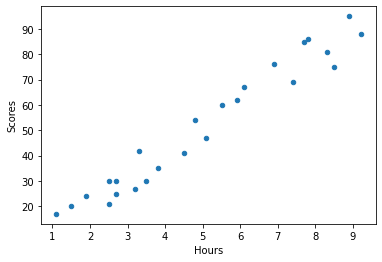

In [191]:
df.plot.scatter(x = 'Hours' , y = 'Scores')

### Standardization

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

scaler_value = scaler.fit_transform(df)
scaler_value

array([[-1.01532822, -1.23022337],
       [ 0.03556882, -0.18082023],
       [-0.7323944 , -0.98805342],
       [ 1.40981881,  0.94930623],
       [-0.61113705, -0.86696844],
       [-1.4195194 , -1.27058503],
       [ 1.69275263,  1.4740078 ],
       [ 0.19724529,  0.34388134],
       [ 1.32898057,  1.19147618],
       [-0.93448999, -1.06877674],
       [ 1.08646587,  1.35292282],
       [ 0.35892176,  0.42460466],
       [-0.20694588, -0.42299019],
       [-0.69197529, -0.38262853],
       [-1.58119586, -1.39167001],
       [ 1.57149528,  1.75653941],
       [-1.01532822, -0.86696844],
       [-1.25784293, -1.1091384 ],
       [ 0.43975999,  0.62641295],
       [ 0.96520852,  0.70713627],
       [-0.93448999, -0.86696844],
       [-0.08568853,  0.10171138],
       [-0.4898797 , -0.66516014],
       [ 0.76311293,  0.98966788],
       [ 1.12688499,  1.39328448]])

### Checking Multi_Colinearity Between X and y 

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [195]:
vvif = scaler_value

### Creating a New Column for VIF Values 

In [196]:
var = pd.DataFrame()
var['VIF_Value'] = [vif(vvif , 1) for i in range(vvif.shape[1])]
var['Features'] = df.columns
var

,VIF_Value,Features
0,21.253171,Hours
1,21.253171,Scores


### Spliting the data into Independent and Dependent Variable 

In [197]:
x = df['Hours']
y = df['Scores']

### Spliting the data Into Train and Test 

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 0)


In [200]:
x_train = np.array(x_train).reshape(-1 , 1)


### Creating a Linear Model 

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
model = LinearRegression()
my_model = model.fit(x_train , y_train)
my_model

LinearRegression()

### Coefficient and Interept

In [203]:
my_model.coef_ , my_model.intercept_

(array([9.91065648]), 2.018160041434662)

In [204]:
x , y

(0     2.5
 1     5.1
 2     3.2
 3     8.5
 4     3.5
 5     1.5
 6     9.2
 7     5.5
 8     8.3
 9     2.7
 10    7.7
 11    5.9
 12    4.5
 13    3.3
 14    1.1
 15    8.9
 16    2.5
 17    1.9
 18    6.1
 19    7.4
 20    2.7
 21    4.8
 22    3.8
 23    6.9
 24    7.8
 Name: Hours, dtype: float64,
 0     21
 1     47
 2     27
 3     75
 4     30
 5     20
 6     88
 7     60
 8     81
 9     25
 10    85
 11    62
 12    41
 13    42
 14    17
 15    95
 16    30
 17    24
 18    67
 19    69
 20    30
 21    54
 22    35
 23    76
 24    86
 Name: Scores, dtype: int64)

### Calculating Coef , Intercept
* y = mx+c

In [205]:
ok = 9.91065648 * x + 2.018160041434662
ok

0     26.794801
1     52.562508
2     33.732261
3     86.258740
4     36.705458
5     16.884145
6     93.196200
7     56.526771
8     84.276609
9     28.776933
10    78.330215
11    60.491033
12    46.616114
13    34.723326
14    12.919882
15    90.223003
16    26.794801
17    20.848407
18    62.473165
19    75.357018
20    28.776933
21    49.589311
22    39.678655
23    70.401690
24    79.321281
Name: Hours, dtype: float64


### Plotting the Least SQuare Method

In [206]:
feature = pd.DataFrame({'Hours' : [df.Hours.min() , df.Hours.max()] })
feature

,Hours
0,1.1
1,9.2


### Prediction

In [207]:
y_pred = my_model.predict(feature)
y_pred

array([12.91988217, 93.19619966])

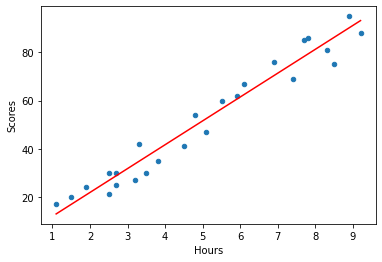

In [208]:
# Predicting the Observed Data
df.plot.scatter(x = 'Hours' , y = 'Scores')

# predicting the LSM data
plt.plot( feature,y_pred , c = 'r')

### Checking Model Score 

In [209]:
my_model.score(feature , y_pred)

1.0

### Observation using statsmodels 

In [210]:
import statsmodels.formula.api as smf
my_model = smf.ols(formula='Hours ~ Scores', data=df).fit()
my_model.mse_model

# ols  = ordinary least square method 
# ~ = means showing Relation between sales and TV


145.82623195883812

### Checking R-Square

In [211]:
my_model.rsquared

0.9529481969048356

                                **Conclusion is that my Model Gives 95% Accuracy**